In [1]:
import fastf1 as f1
import numpy as np
import pandas as pd

# from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for legend handle
from prod.utils import events
from prod.utils import plotting
from prod.utils import timing

YEAR, ROUND, EVENT = events.next_event()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\Kyle\AppData\Local\Temp\fastf1.
	Size: 24.34 MB


In [2]:
sesh = f1.get_session(year=2023, gp=7, identifier="R")

In [3]:
sesh.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO

In [4]:
sesh.laps["LapTime"] = sesh.laps["LapTime"] / np.timedelta64(1, "s")

Fastest lap time by tire compound per lap

In [5]:
fast_laps_tires = sesh.laps.groupby(["Compound", "LapNumber"])["LapTime"].min().reset_index()

Text(0.5, 1.0, 'Lap Times by Compound')

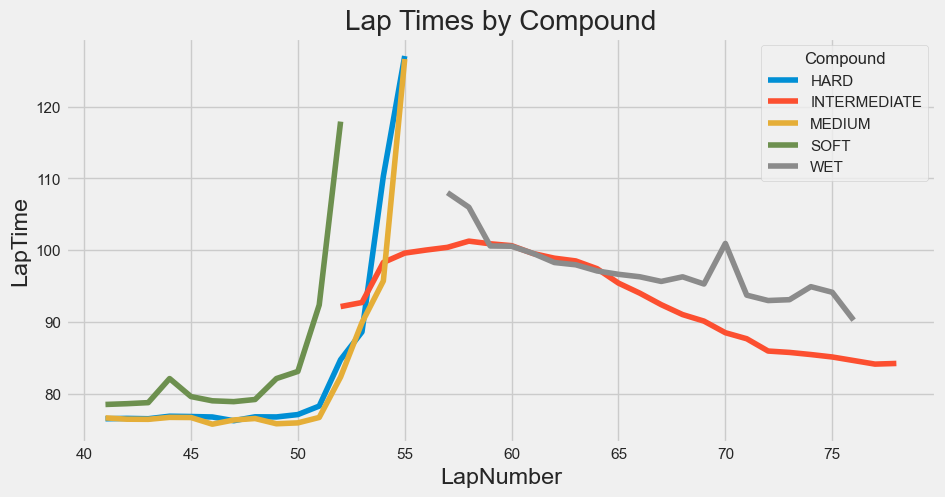

In [33]:
sns.set(rc={"figure.figsize": (10,5)})
plt.style.use("fivethirtyeight")
sns.lineplot(fast_laps_tires[fast_laps_tires["LapNumber"] > 40], x="LapNumber", y="LapTime", hue="Compound").set_title("Lap Times by Compound")

Driver Lap Times

In [34]:
driver_numbers = timing.get_driver_numbers(session=sesh)

In [35]:
laps = sesh.laps

C:\Users\Kyle\AppData\Local\Temp\ipykernel_2832\1814355483.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for label, df in laps[laps["Driver"].isin(["ALO", "VER"])][laps["LapNumber"] > 40].groupby("Driver"):


Text(0.5, 1.0, 'ALO vs. VER Lap Times (s)')

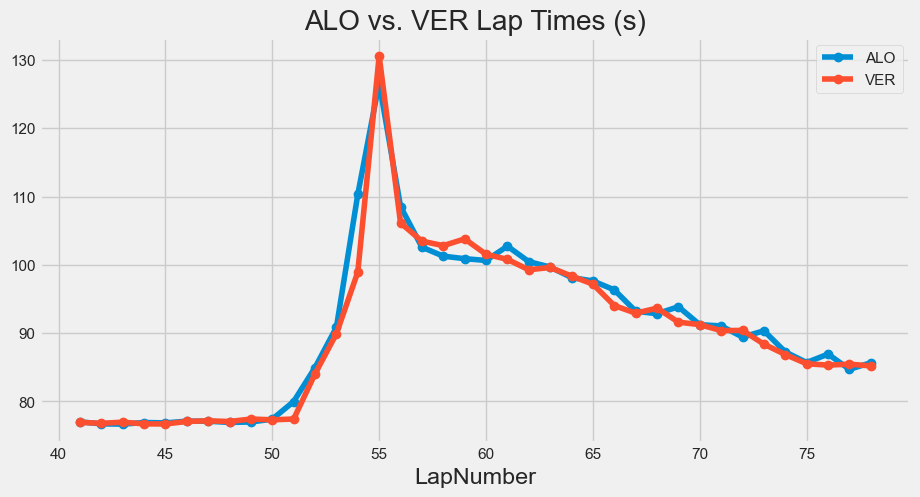

In [75]:
fig, ax = plt.subplots()
for label, df in laps[laps["Driver"].isin(["ALO", "VER"])][laps["LapNumber"] > 40].groupby("Driver"):
    df.plot(x="LapNumber", y="LapTime", ax=ax, label=label, marker="o")
plt.legend()
plt.title("ALO vs. VER Lap Times (s)")

In [55]:
alo_ver_gap = laps[laps["Driver"].isin(["ALO", "VER"])][laps["LapNumber"] > 40].sort_values(["LapNumber", "Driver"], ascending=[True, False])

C:\Users\Kyle\AppData\Local\Temp\ipykernel_2832\4181900677.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alo_ver_gap = laps[laps["Driver"].isin(["ALO", "VER"])][laps["LapNumber"] > 40].sort_values(["LapNumber", "Driver"], ascending=[True, False])


In [70]:
alo_ver_gap["gap_to_ver"] = (alo_ver_gap.Time.shift(1) - alo_ver_gap.Time) / np.timedelta64(1, "s")

<Axes: xlabel='LapNumber'>

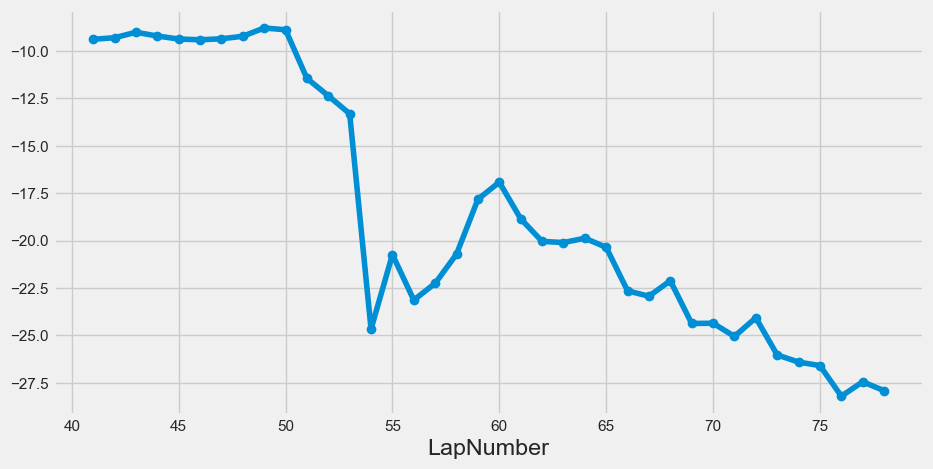

In [72]:
alo_ver_gap[alo_ver_gap["Driver"] == "ALO"].set_index("LapNumber").gap_to_ver.plot(marker="o")

In [74]:
alo_ver_gap[alo_ver_gap["Driver"] == "ALO"].set_index("LapNumber")["gap_to_ver"]

LapNumber
41.0    -9.381
42.0    -9.300
43.0    -9.011
44.0    -9.208
45.0    -9.369
46.0    -9.408
47.0    -9.356
48.0    -9.222
49.0    -8.786
50.0    -8.880
51.0   -11.444
52.0   -12.365
53.0   -13.308
54.0   -24.673
55.0   -20.741
56.0   -23.141
57.0   -22.258
58.0   -20.717
59.0   -17.823
60.0   -16.921
61.0   -18.851
62.0   -20.046
63.0   -20.107
64.0   -19.878
65.0   -20.358
66.0   -22.655
67.0   -22.939
68.0   -22.121
69.0   -24.378
70.0   -24.364
71.0   -25.058
72.0   -24.075
73.0   -26.035
74.0   -26.416
75.0   -26.598
76.0   -28.213
77.0   -27.454
78.0   -27.921
Name: gap_to_ver, dtype: float64